# ADA made me famous

The first step of the project is to preprocess the data in order to have an exploitable and trustworthy dataset. Our main criterion to define what is a famous quote is the number of occurrences associated with it. 

When analyzing the distribution of the number of occurrences across the different years, we observed that most of the quotes (75%) have been quoted only once or twice. Since we want to focus on only famous quotes, we decided to filter on the 99.9th percentile, keeping only the quotes with the highest number of occurrences (above 215) and labeling them as famous (encoded by 1 in the’ famous’ column). 

In order to be able to compare and contrast with ‘non-famous’ quotes (encoded by 0 in the ‘famous’ columns), we  took a sample of quotes that appeared less than 10 times throughout the different years. Thus, we have a total of 257 378 quotes, with 115 218 famous quotes and 142 160 non-famous quotes.

We decided to remove quotes where the speaker is attributed to 'None' with the highest probability. Indeed, we observed that the second speaker often has a very low probability, so an analysis of fame based on attributes of the speaker seems irrelevant. Moreover, when looking at the citations associated with 'None' speakers, they seem like text pages and not real quotes. This brings the dataset down to 68 355 famous quotes and 93 149 non-famous quotes. More covariates were added like the lengths of a quote (number of words) and the number of characters. We retrieved the speaker’s attribute using the Wikidata entities in the speaker_attributes.parquet file in order to study how these covariates impact our research question.

Once the dataset was filtered and extended, we started to perform a univariate data analysis with summary statistics and graphical information on the distribution of each covariate in order to get a better understanding of the data and design a more complex data analysis. 

Then, multivariate data analysis will follow to understand the relation between the different covariates associated with a quote. We will use scatterplots in order to understand the correlation between the different variables and linear regression to have a more complete insight into their relationship.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li>
            <span><a href="#Loading-the-data" data-toc-modified-id="Loading-the-data-1">Loading the data</a></span>
            </li>
           <li>
            <span><a href="#Filtering-the-data" data-toc-modified-id="Filtering-the-data-1">Filtering the data</a></span>
            <ul class="toc-item">
                <li>
                    <span><a href="#Select-and-label-famous-quotes" data-toc-modified-id="Pandas-Data-Structures-1.1">Select and label famous quotes</a></span>
                </li>
                <li>
                    <span><a href="#Select-'non-famous'-quotes" data-toc-modified-id="Select-'non-famous'-quotes-1.2">Select 'non-famous' quotes</a></span>
                </li>
                <li>
                    <span><a href="#Output-of-the-data-collection-step" data-toc-modified-id="Output-of-the-data-collection-step-1.2">Output of the data collection step</a></span>
                </li>
            </ul>
        </li>
    </ul>
    <ul class="toc-item">
        <li>
            <span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1">Preprocessing</a></span>
        </li>
    </ul>
<ul class="toc-item">
        <li>
            <span><a href="#Enriching-the-dataset" data-toc-modified-id="Enriching-the-datase-1">Enriching the dataset</a></span>
            <ul class="toc-item">
                <li>
                    <span><a href="#Finding-newspaper-name" data-toc-modified-id="Finding-newspaper-name-1.1">Finding newspaper name</a></span>
                </li>
                <li>
                    <span><a href="#Adding-the-length-of-a-quote-and-the-number-of-characters" data-toc-modified-id="Adding-the-length-of-a-quote-and-the-number-of-characters-1.2">Adding the length of a quote and the number of characters </a></span>
                </li>
                <li>
                    <span><a href="#Merge-wikidata-with-our-dataframe-to-get-information-on-people-issuing-famous-quotes" data-toc-modified-id="Merge-wikidata-with-our-dataframe-to-get-information-on-people-issuing-famous-quotes-1.3">Merge wikidata with our dataframe to get information on people issuing famous quotes</a></span>
                    </li>
                    <ul class="toc-item">
                        <li>
                            <span><a href="#Load-speaker-attributes-and-wiki-data" data-toc-modified-id="Load-speaker-attributes-and-wiki-data-3.3.1">Load speaker attributes and wiki data</a></span>
                         </li>
                        <li>
                            <span><a href="#Read,-Filter-and-translate-the-QIDs-according-to-the-wikidata-labels." data-toc-modified-id="Read,-Filter-and-translate-the-QIDs-according-to-the-wikidata-labels.-3.3.2">Read, Filter and translate the QIDs according to the wikidata labels.</a></span>
                        </li>
                            <ul class="toc-item">
                        <li>
                            <span><a href="#Gender" data-toc-modified-id="Gender-3.3.2.1">Gender</a></span>
                        </li>
                        <li>
                            <span><a href="#Nationality" data-toc-modified-id="Nationality-3.3.2.2">Nationality</a></span>
                         </li>
                        <li>
                            <span><a href="#Occupation" data-toc-modified-id="Occupation-3.3.2.3">Occupation</a></span>
                            </ul>
                        <li>
                            <span><a href="#Count-the-total-number-of-quotes-from-each-speaker." data-toc-modified-id="Count-the-total-number-of-quotes-from-each-speaker.-3.3.3">Count the total number of quotes from each speaker.</a></span>
                         </li>
                        <li>
                            <span><a href="#Extra-features" data-toc-modified-id="Extra-features-3.3.4">Extra features</a></span>
                            <ul class="toc-item">
                        <li>
                            <span><a href="#Polarity" data-toc-modified-id="Polarity-3.3.4.1">Polarity</a></span>
                         </li>
                        <li>
                            <span><a href="#Subjectivity" data-toc-modified-id="Subjectivity-3.3.4.2">Subjectivity</a></span>
                    </ul>
                    </ul>
                <li>
                    <span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-1.4">Exploratory data analysis </a></span>
                     </li>
                      <ul class="toc-item">
                        <li>
                            <span><a href="#Visualize-the-distribution-of-the-number-of-occurrences-between-'famous'-and-'non-famous'-quotes" data-toc-modified-id="isualize-the-distribution-of-the-number-of-occurrences-between-'famous'-and-'non-famous'-quotes-3.3.6">Visualize the distribution of the number of occurrences between 'famous' and 'non-famous' quotes</a></span>
                         </li>
                        <li>
                            <span><a href="#Length-of-a-quote" data-toc-modified-id="Length-of-a-quote-3.3.7">Length of a quote</a></span>
                        </li>
                        <li>
                            <span><a href="#Scatterplots" data-toc-modified-id="Scatterplots-3.3.8">Scatterplots</a></span>
                    </ul>
                  <li>  
                    <span><a href="#Regression-analysis" data-toc-modified-id="Regression-analysis-1.5">Regression analysis</a></span>
                </li>
                <li>  
                    <span><a href="#Embeddings-and-PCA" data-toc-modified-id="Embeddings-and-PCA-1.6">Embeddings and PCA</a></span>
                </li>
                <ul class="toc-item">
                        <li>
                            <span><a href="#Generation-of-embeddings" data-toc-modified-id="Generation-of-embeddings-3.6.1">Generation of embeddings</a></span>
                         </li>
                        <li>
                            <span><a href="#PCA" data-toc-modified-id="PCA-3.6.2">PCA</a></span>
                        </ul>
            </ul>
        </li>
    </ul>
    
    
    
</div>
                    

In [4]:
# Imports you may need
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import math
from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pickle 

## Loading the data

In [5]:
# Extract the number of occurrences
import bz2
import json

In [ ]:
def get_occurrences(quote_file_name):  
    occurrences = []
    with bz2.open(quote_file_name, 'rb') as s_file:
        for instance in s_file:
            instance = json.loads(instance) # loading a sample
            nb_occurrences = instance['numOccurrences'] # extracting the number of occurences
            occurrences.append(nb_occurrences)
    return occurrences

In [ ]:
occurrence_2020 = get_occurrences('quotes-2020.json.bz2')
occurrence_2019 = get_occurrences('quotes-2019.json.bz2')
occurrence_2018 = get_occurrences('quotes-2018.json.bz2')
occurrence_2017 = get_occurrences('quotes-2017.json.bz2')
occurrence_2016 = get_occurrences('quotes-2016.json.bz2')
occurrence_2015 = get_occurrences('quotes-2015.json.bz2')

In [ ]:
df_occurrence_2020 = pd.DataFrame(occurrence_2020)
df_occurrence_2019 = pd.DataFrame(occurrence_2019)
df_occurrence_2018 = pd.DataFrame(occurrence_2018)
df_occurrence_2017 = pd.DataFrame(occurrence_2017)
df_occurrence_2016 = pd.DataFrame(occurrence_2016)
df_occurrence_2015 = pd.DataFrame(occurrence_2015)

In [ ]:
# Save the occurences to pickle
df_occurrence_2020.to_pickle('occurrence_2020.pkl', compression = 'bz2')
df_occurrence_2019.to_pickle('occurrence_2019.pkl', compression = 'bz2')
df_occurrence_2018.to_pickle('occurrence_2018.pkl', compression = 'bz2')
df_occurrence_2017.to_pickle('occurrence_2017.pkl', compression = 'bz2')
df_occurrence_2016.to_pickle('occurrence_2016.pkl', compression = 'bz2')
df_occurrence_2015.to_pickle('occurrence_2015.pkl', compression = 'bz2')

In [ ]:
df_occurrence_merged =  pd.concat([df_occurrence_2020, df_occurrence_2019, df_occurrence_2018, df_occurrence_2017, df_occurrence_2016, df_occurrence_2015])
df_occurrence_merged.to_pickle('occurrences_years.pkl', compression = 'bz2')

In [ ]:
df_occurrence_merged = pd.read_pickle('occurrences_years.pkl', compression = 'bz2')

In [ ]:
# Descriptive analysis of the number of occurrences
df_occurrence_merged.rename(columns={df_occurrence_merged.columns[0]: 'numOccurrences'}, inplace=True)
df_occurrence_merged.describe()

In [ ]:
# Calculate some percentiles
np.percentile(df_occurrence_merged, [90, 95, 99, 99.9])

# Filtering the data

### Select and label famous quotes

We observe that most of the quotes (75%) have been quoted only once or twice, and as we will focus only on famous quotes, we will already filter on the 99.9th percentile, keeping only the quotes with the highest number of occurences (above 215) and label them as famous (encoded by 1 in the famous column). 

In [ ]:
threshold = np.percentile(df_occurrence_merged, [99.9])[0]

In [ ]:
# Select only famous quotes
def process_chunk(chunk,threshold):
        nbOcc=chunk[chunk['numOccurrences']>threshold]
        print(chunk.columns)
        return nbOcc
        
def get_famous_quotes_dataframe(quote_file_name, threshold):
    df=pd.DataFrame()
    with pd.read_json(quote_file_name, lines=True, compression='bz2', chunksize=1000000) as df_reader:
        for chunk in df_reader:
            df=pd.concat([df,process_chunk(chunk,threshold)])
        return df

In [ ]:
famous_2020 = get_famous_quotes_dataframe('quotes-2020.json.bz2', threshold)
famous_2020.to_pickle('famous_2020.pkl', compression = 'bz2')

famous_2019 = get_famous_quotes_dataframe('quotes-2019.json.bz2', threshold)
famous_2019.to_pickle('famous_2019.pkl', compression = 'bz2')

famous_2018 = get_famous_quotes_dataframe('quotes-2018.json.bz2', threshold)
famous_2018.to_pickle('famous_2018.pkl', compression = 'bz2')

famous_2017 = get_famous_quotes_dataframe('quotes-2017.json.bz2', threshold)
famous_2017.to_pickle('famous_2017.pkl', compression = 'bz2')

famous_2016 = get_famous_quotes_dataframe('quotes-2016.json.bz2', threshold)
famous_2016.to_pickle('famous_2016.pkl', compression = 'bz2')

famous_2015 = get_famous_quotes_dataframe('quotes-2015.json.bz2', threshold)
famous_2015.to_pickle('famous_2015.pkl', compression = 'bz2')

We add a column with the year and then merge all the different years file

In [ ]:
# add column indicating the year 
famous_2020['year'] = "2020"
famous_2019['year'] = "2019"
famous_2018['year'] = "2018"
famous_2017['year'] = "2017"
famous_2016['year'] = "2016"
famous_2015['year'] = "2015"

In [ ]:
# merge all famous datasets
famous_merged =  pd.concat([famous_2020, famous_2019, famous_2018, famous_2017, famous_2016, famous_2015])
famous_merged['famous'] = 1
famous_merged.to_pickle('famous_merged.pkl', compression = 'bz2')

### Select 'non-famous' quotes
We need to label data as "famous" (more than 215 occurrences) and "non-famous" (less than 10 occurrences) based on the number of occurences to be able to train our classifier later on. We decided to make a clear distinction between famous and non-famous quotes, so we didn't consider intermediate quotes (maybe on the rise to fame ?).
For the "non-famous" group we randomly selected some quotes of every year having less than 10 occurrences.

In [ ]:
nonfamous_threshold = np.percentile(df_occurrence_merged, [95])[0]

In [ ]:
# Select "non-famous" quotes
def nonfamous_chunk(chunk,nonfamous_threshold):
        nbOcc=chunk[chunk['numOccurrences']<nonfamous_threshold]
        print(chunk.columns)
        return nbOcc
        
def get_nonfamous_quotes_dataframe(quote_file_name, nonfamous_threshold):
    df=pd.DataFrame()
    with pd.read_json(quote_file_name, lines=True, compression='bz2', chunksize=25000, nrows = 25000) as df_reader:
        for chunk in df_reader:
            df=pd.concat([df,nonfamous_chunk(chunk,nonfamous_threshold)])
        return df

In [ ]:
nonfamous_2020 = get_nonfamous_quotes_dataframe('original_data/quotes-2020.json.bz2', nonfamous_threshold)
nonfamous_2020.to_pickle('nonfamous_2020.pkl', compression = 'bz2')

nonfamous_2019 = get_nonfamous_quotes_dataframe('original_data/quotes-2019.json.bz2', nonfamous_threshold)
nonfamous_2019.to_pickle('nonfamous_2019.pkl', compression = 'bz2')

nonfamous_2018 = get_nonfamous_quotes_dataframe('original_data/quotes-2018.json.bz2', nonfamous_threshold)
nonfamous_2018.to_pickle('nonfamous_2018.pkl', compression = 'bz2')

nonfamous_2017 = get_nonfamous_quotes_dataframe('original_data/quotes-2017.json.bz2', nonfamous_threshold)
nonfamous_2017.to_pickle('nonfamous_2017.pkl', compression = 'bz2')

nonfamous_2016 = get_nonfamous_quotes_dataframe('original_data/quotes-2016.json.bz2', nonfamous_threshold)
nonfamous_2016.to_pickle('nonfamous_2016.pkl', compression = 'bz2')

nonfamous_2015 = get_nonfamous_quotes_dataframe('original_data/quotes-2015.json.bz2', nonfamous_threshold)
nonfamous_2015.to_pickle('nonfamous_2015.pkl', compression = 'bz2')


We add a column with the year and then merge all the different years file

In [ ]:
# add column indicating the year 
nonfamous_2020['year'] = "2020"
nonfamous_2019['year'] = "2019"
nonfamous_2018['year'] = "2018"
nonfamous_2017['year'] = "2017"
nonfamous_2016['year'] = "2016"
nonfamous_2015['year'] = "2015"

In [ ]:
# merge all non-famous datasets and add a column to be able to label non-famous (encoded by 0) from famous datasets (encoded by 1)
nonfamous_merged =  pd.concat([nonfamous_2020, nonfamous_2019, nonfamous_2018, nonfamous_2017, nonfamous_2016, nonfamous_2015])
nonfamous_merged['famous'] = 0
nonfamous_merged.to_pickle('nonfamous_merged.pkl', compression = 'bz2')

# Output of the data collection step
* A dataframe of "famous" quotes of a size: 115218 rows × 13 columns 
* A dataframe of "non-famous" quotes of a size: 142160 rows × 9 columns
* A merged dataframe containing "famous" and "non-famous" quotes from years 2015 to 2020:
    - "Famous" quotes (over 215 occurences) are encoded by a 1 in the famous column
    - "Non-famous" quotes (less than 10 occurences) are encoded by a 0 in the famous column
    - Additionnal column "year" to be able to distinguish easily from which year the quote is 

In [ ]:
merged =  pd.concat([nonfamous_merged, famous_merged])

In [ ]:
merged.to_pickle('merged.pkl', compression = 'bz2')

In [6]:
# load the data 
merged = pd.read_pickle('merged.pkl', compression = 'bz2')

In [7]:
merged

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,year,famous
0,2020-01-28-000082,[ D ] espite the efforts of the partners to cr...,None,[],2020-01-28 08:04:05,1,"[[None, 0.7272], [Prime Minister Netanyahu, 0....",[http://israelnationalnews.com/News/News.aspx/...,E,2020,0
1,2020-01-16-000088,[ Department of Homeland Security ] was livid ...,Sue Myrick,[Q367796],2020-01-16 12:00:13,1,"[[Sue Myrick, 0.8867], [None, 0.0992], [Ron Wy...",[http://thehill.com/opinion/international/4782...,E,2020,0
2,2020-02-10-000142,... He (Madhav) also disclosed that the illega...,None,[],2020-02-10 23:45:54,1,"[[None, 0.8926], [Prakash Rai, 0.1074]]",[https://indianexpress.com/article/business/ec...,E,2020,0
3,2020-02-15-000053,"... [ I ] f it gets to the floor,",None,[],2020-02-15 14:12:51,2,"[[None, 0.581], [Andy Harris, 0.4191]]",[https://patriotpost.us/opinion/68622-trump-bu...,E,2020,0
4,2020-01-24-000168,[ I met them ] when they just turned 4 and 7. ...,Meghan King Edmonds,[Q20684375],2020-01-24 20:37:09,4,"[[Meghan King Edmonds, 0.5446], [None, 0.2705]...",[https://people.com/parents/meghan-king-edmond...,E,2020,0
...,...,...,...,...,...,...,...,...,...,...,...
20862689,2015-12-14-009516,be the Healthiest Individual Ever Elected to t...,Donald Trump,"[Q22686, Q27947481]",2015-12-14 21:29:14,258,"[[Donald Trump, 0.4715], [None, 0.1979], [Haro...",[http://time.com/4148215/donald-trump-health-p...,E,2015,1
20863436,2015-07-17-019430,Everything seemed fine. He was normal. He was ...,None,[],2015-07-17 23:50:19,1044,"[[None, 0.936], [Muhammad Youssef, 0.064]]",[http://azdailysun.com/news/national/tennessee...,E,2015,1
20865344,2015-07-16-046131,I was having the nicest morning. It was on tel...,Queen Latifah,[Q1112005],2015-07-16 11:25:55,217,"[[Queen Latifah, 0.8503], [None, 0.1497]]",[http://tdn.com/entertainment/television/the-l...,E,2015,1
20872619,2015-08-06-007203,"And, ultimately, that's what I'm going to try ...",Scott Walker,"[Q13502385, Q2035840, Q20712628, Q28835721, Q4...",2015-08-06 20:47:02,277,"[[Scott Walker, 0.5031], [None, 0.2871], [Hill...",[http://azdailysun.com/news/national/govt-and-...,E,2015,1


# Preprocessing 

We decided to remove quotes where the speaker is attributed to 'None' with the highest probability. Indeed, we observed that the second speaker often has a very low probability, so an analysis of fame based on attributes of the speaker seems irrelevant. Moreover, when looking at the citations associated with 'None' speakers, they seem like text pages and not real quotes.

In [8]:
famous_merged_none = merged[merged["speaker"] == "None"]

In [9]:
def second_speaker(probas): 
    if len(probas)>1: 
        second_sp = probas[1]
        proba = float(second_sp[1])
    else : 
        proba = 0
    return(proba)

In [10]:
pd.options.mode.chained_assignment = None  # default='warn'
famous_merged_none["Second_speaker"]=famous_merged_none["probas"].apply(lambda x : second_speaker(x))

In [11]:
filtered_merged = merged[merged['speaker']!='None']

In [12]:
filtered_merged.to_pickle('filtered_merged.pkl', compression = 'bz2')

In [13]:
filtered_merged= pd.read_pickle('filtered_merged.pkl', compression = 'bz2')

This results in a dataframe with 68'355 "famous" quotes with speakers and 93'149 "non-famous" quotes with speakers.

# Enriching the dataset

## Finding newspaper name

We decided to retrieve the name of the newspaper where the quote was cited and added as a new column.

In [11]:
import re

In [12]:
filtered_merged.loc[12097]["quotation"]

12097    There shouldn't be a & shy; subject & shy; lot...
12097                 This means an enormous amount to me,
12097    would come out of a pub and have a go at me ab...
Name: quotation, dtype: object

In [13]:
def name_newspaper_step_1(url):  
    if (url[0:8] == 'https://'): 
        try : 
            found = re.search('https://(.+?)/', url).group(1) 
        except AttributeError : 
            found = re.search('https://(.+?)?', url).group(1) 
    elif (url[0:7] == 'http://'):
        try : 
            found = re.search('http://(.+?)/', url).group(1) 
        except AttributeError : 
            found = re.search('http://(.+?)?', url).group(1)
    else : 
        found = None 
    return(found)

def erase_www(found):
    if (found[0:4] == 'www.'): 
        found = found[4:]
    return(found)
    
def name_newspaper(url) : 
    found = name_newspaper_step_1(url) 
    found = erase_www(found)
    return(found)

In [14]:
name = name_newspaper('http://www.seattletimes.com/nation-world/nation/hawaii-activists-get-ready-for-hawaii-telescope-convoys/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_seattle-news')

In [15]:
def array_newspaper1(urls) : 
    newspaper = []
    for url in urls : 
        if name_newspaper(url) != None : 
            newspaper = newspaper + [name_newspaper(url)]
    return(list(set(newspaper)))
##sans les duplicata 

In [16]:
def array_newspaper(urls) : 
    urls = np.array(urls)
    newspaper = []
    for url in urls : 
        if name_newspaper(url) != None : 
            newspaper = newspaper + [name_newspaper(url)]
    return(newspaper)

In [17]:
filtered_merged["newspaper"]= filtered_merged["urls"].apply(lambda x : array_newspaper(x))

In [18]:
def search_metro(x): 
    bool = 0 
    for name in x : 
        if 'metro.co.uk' in name : 
            bool = 1 
            
    return bool 

## Adding the length of a quote and the number of characters

We characterize the length of a quote by the number of words and the number of characters.

In [19]:
# Length of a quote is defined by the number of words 
filtered_merged['nb_characters'] = filtered_merged['quotation'].str.len() # number of characters
filtered_merged['nb_words'] = filtered_merged['quotation'].str.split().apply(len) # number of words

##  Merge wikidata with our dataframe to get information on people issuing famous quotes

#### Load speaker attributes and wiki data

In [21]:
# additional metadata about the speakers 
speaker_attributes = pd.read_parquet("Project_datasets/speaker_attributes.parquet") 

In [22]:
# Extract the labels
wikidata_labels = pd.read_csv('Project_datasets/wikidata_labels_descriptions_quotebank.csv.bz2', compression='bz2', index_col='QID')

In [23]:
# Subset speaker attributes dataframe to speakers in the filtered_merged dataframe
speaker_attributes_info = speaker_attributes.loc[speaker_attributes['label'].isin(filtered_merged['speaker'])]

In [24]:
speaker_attributes_info.to_pickle('speaker_attributes_info.pkl', compression = 'bz2')

In [25]:
speaker_attributes_info = pd.read_pickle('speaker_attributes_info.pkl', compression = 'bz2')

The speaker attributes columns sometimes gives several values for an attribute, for example a speaker can have both the Canadian and United States nationality. In our study, we will only focus on the first attribute.

#### Read, Filter and translate the QIDs according to the wikidata labels.

In [26]:
# In the speaker_all_info keep only the speakers with gender/nationality/occupation etc. information that are also in the wikidata_labels
speaker_all_info = speaker_attributes_info[speaker_attributes_info['gender'].apply(lambda x: np.any(x) in wikidata_labels['Label']) == True]
speaker_all_info = speaker_all_info[speaker_all_info['nationality'].apply(lambda x: np.any(x) in wikidata_labels['Label']) == True]
speaker_all_info = speaker_all_info[speaker_all_info['occupation'].apply(lambda x: np.any(x) in wikidata_labels['Label']) == True]

In [27]:
# Change the QID to gender (e.g. Q6581097 male, Q6581072 female)
speaker_all_info['gender'] = (speaker_all_info['gender']).apply(lambda x: (wikidata_labels.loc[x]['Label']).iloc[0])
# Change the QID to nationality
speaker_all_info['nationality'] = (speaker_all_info['nationality']).apply(lambda x: (wikidata_labels.loc[x]['Label']).iloc[0])
# Change the QID to occupation
speaker_all_info['occupation'] = (speaker_all_info['occupation']).apply(lambda x: (wikidata_labels.loc[x]['Label']).iloc[0])

In [28]:
speaker_all_info.to_pickle('speaker_all_info.pkl', compression = 'bz2')

In [29]:
speaker_all_info = pd.read_pickle('speaker_all_info.pkl', compression = 'bz2')

In [29]:
quotes_speaker_merged = pd.merge(filtered_merged, speaker_all_info, left_on = 'speaker' , right_on = 'label', how = 'outer')

In [30]:
quotes_speaker_merged.to_pickle('quotes_speaker_merged.pkl', compression = 'bz2')

In [14]:
quotes_speaker_merged = pd.read_pickle('quotes_speaker_merged.pkl', compression = 'bz2')

For each category, we will transform the quids into their appropriate labels according to the information in wikidata_labels.

#### Gender

In [30]:
speaker_attributes_gender = speaker_attributes_info[speaker_attributes_info['gender'].apply(lambda x: np.any(x) in wikidata_labels['Label']) == True]

# Change the QID to gender (e.g. Q6581097 male, Q6581072 female)
pd.options.mode.chained_assignment = None  # default='warn'

speaker_attributes_gender['gender'] = (speaker_attributes_gender['gender']).apply(lambda x: (wikidata_labels.loc[x]['Label']).iloc[0])
quotes_gender_merged = pd.merge(filtered_merged, speaker_attributes_gender, left_on = 'speaker' , right_on = 'label', how = 'outer')

As the number of male and female speakers composes the majority of the gender, we will only consider those two gender labels.

In [31]:
quotes_gender_merged = quotes_gender_merged[(quotes_gender_merged['gender']).isin(['male', 'female'])]

#### Nationality

In [32]:
speaker_attributes_nationality = speaker_attributes_info[speaker_attributes_info['nationality'].apply(lambda x: np.any(x) in wikidata_labels['Label']) == True]

# Change the QID to gender (e.g. Q6581097 male, Q6581072 female)
pd.options.mode.chained_assignment = None  # default='warn'

speaker_attributes_nationality['nationality'] = (speaker_attributes_nationality['nationality']).apply(lambda x: (wikidata_labels.loc[x]['Label']).iloc[0])


In [33]:
quotes_nationality_filtered_merged = pd.merge(filtered_merged, speaker_attributes_nationality, left_on = 'speaker' , right_on = 'label', how = 'outer')

In [34]:
grouped = quotes_nationality_filtered_merged.groupby('nationality')
grouped_top = grouped["numOccurrences"].agg(["count"]).sort_values(ascending = False, by = 'count')


##### Discretization

In order to regress and simplify the analysis, we will merge the country name with the continent name. 

In [39]:
quotes_continent_merged = quotes_nationality_filtered_merged

In [40]:

# Change unrecognized country names to be able to map countries to continents

def change_unrecognized_countries(df):
    df = pd.DataFrame(df)
    df.loc[:, 'nationality'].replace(['Weimar Republic', 'German Reich','East Germany', 'West Germany', 'Bavaria', 'Nazi Germany', 'German Empire', 'Württemberg', 'Grand Duchy of Hesse', 'Prussia', 'Bavaria', 'German Confederation', 'Württemberg', 'Württemberg'], ['Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany',  'Germany', 'Germany', 'Germany', 'Germany', 'Germany','Germany', 'Germany', 'Germany'], inplace=True) 
    df.loc[:, 'nationality'].replace(['Soviet Union'], ['Russia'], inplace=True)   
    df.loc[:, 'nationality'].replace(['Imperial State of Iran'], ['Iran'], inplace=True)
    df.loc[:, 'nationality'].replace(['British India'], ['India'], inplace=True)
    df.loc[:, 'nationality'].replace(['Austria-Hungary', 'Prussia'], ['Austria', 'Austria'], inplace=True)
    df.loc[:, 'nationality'].replace(['Northern Ireland', 'Kingdom of Scotland', 'Scotland', 'Kingdom of England', 'English people', 'England', 'United Kingdom of Great Britain and Ireland', 'Wales', 'Colony of New South Wales', 'Welsh people'], ['United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom'], inplace=True)
    df.loc[:, 'nationality'].replace(['Patiala State'], ['India'], inplace=True)
    df.loc[:, 'nationality'].replace(['Eastern Han', 'Song dynasty', 'Northern Song Dynasty', 'Chen dynasty', 'Liu Song dynasty', 'Yuan Empire', 'Qing dynasty', 'Liang dynasty', 'Eastern Jin dynasty', 'Ming dynasty', 'Tang Empire', 'Western Jin dynasty', 'Wu guo', 'Wuyue', 'Min', 'Jin dynasty', 'Northern Wei', 'Sui dynasty', 'Western Han', 'Later Tang Dynasty', 'Shu Han', 'Northern Zhou', 'Cao Wei', 'Liao dynasty', 'Northern Qi', 'Later Zhao', 'Eastern Wu', 'Xin dynasty', 'Former Yan', 'Liu Qi', 'Qin dynasty', 'Chinese Empire', 'Chu (state)'], ['China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China','China', 'China', 'China', 'China', 'China','China', 'China', 'China', 'China','China', 'China', 'China', 'China', 'China', 'China', 'China', 'China','China','China','China','China','China', 'China', 'China'], inplace=True)
    df.loc[:, 'nationality'].replace(['Second Syrian Republic'], ['Syria'], inplace=True)
    df.loc[:, 'nationality'].replace(['Cook Islands Maori people'], ['New Zealand'], inplace=True)
    df.loc[:, 'nationality'].replace(['Polynesia'], ['New Zealand'], inplace=True)
    df.loc[:, 'nationality'].replace(['Canadians'], ['Canada'], inplace=True)
    df.loc[:, 'nationality'].replace(['Byblos'], ['Syria'], inplace=True)
    df.loc[:, 'nationality'].replace(['Liban', 'Siria'], ['Syria', 'Syria'], inplace=True)
    df.loc[:, 'nationality'].replace(['British Hong Kong', 'East Timor', 'Republic of China (1912–1949)', 'Taiwan under Japanese rule', 'Southern Song Dynasty', 'Ancient China', 'Southern Tang'], ['China', 'China', 'China', 'China', 'China', 'China', 'China'], inplace=True)
    # Issue with Kingdom of Italy
    df['nationality'] = df['nationality'].apply(lambda x: str(x).replace("Kingdom of ", ""))
    # Issue with the Netherlands
    df['nationality'] = df['nationality'].apply(lambda x: str(x).replace("the ", ""))
    # Issue with The Bahamas
    df['nationality'] = df['nationality'].apply(lambda x: str(x).replace("The ", ""))
    # Issue with Empire of Jap
    df['nationality'] = df['nationality'].apply(lambda x: str(x).replace("Empire of ", ""))
    df.loc[:, 'nationality'].replace(['Democratic Republic of Congo', 'Republic of Congo', 'Colonial Nigeria', 'Republic of Egypt (1953–1958)', 'Akkadian empire', 'Federation of Rhodesia and Nyasaland'], ['Congo', 'Congo', 'Congo', 'Egypt','Egypt','Nigeria'], inplace=True)
    df.loc[:, 'nationality'].replace(['Sardinia', 'Holy Roman Empire', 'Vatican City', 'Papal States', 'Grand Duchy of Tuscany', 'Naples', 'Verdis', 'Lombardy–Venetia'], ['Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy'], inplace=True)
    df.loc[:, 'nationality'].replace(['Russian Empire', 'Tsardom of Russia', 'Russian Soviet Federative Socialist Republic'], ['Russia', 'Russia', 'Russia'], inplace=True)
    df.loc[:, 'nationality'].replace(['State of Palestine'], ['Palestine'], inplace=True)
    df.loc[:, 'nationality'].replace(['Socialist Federal Republic of Yugoslavia', 'Federal Republic of Yugoslavia', 'Yugoslavia'], ['Croatia', 'Croatia', 'Croatia'], inplace=True)
    df.loc[:, 'nationality'].replace(['Colony of New Zealand'], ['New Zealand'], inplace=True)
    df.loc[:, 'nationality'].replace(['Irish Free State', 'Irish Republic'], ['United Kingdom', 'United Kingdom'], inplace=True)
    # Saint Vincent and Grenadines is in North America
    df.loc[:, 'nationality'].replace(['Saint Vincent and Grenadines', 'Virgin Islands', 'Colony of Virginia', 'Thirteen Colonies','British America', 'North America', 'British North America', 'Americans', 'Saint Kitts', 'Canada–United States border'], ['United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States'], inplace=True)
    df.loc[:, 'nationality'].replace(['Australasia at Olympics', 'Australians', 'Perth', 'Tasmania'], ['Australia', 'Australia', 'Australia', 'Australia'], inplace=True)
    df.loc[:, 'nationality'].replace(['Mexico–United States border', 'Mexico City',  'Mexicano', 'Mexicans'], ['Mexico', 'Mexico' , 'Mexico', 'Mexico'], inplace=True)
    df.loc[:, 'nationality'].replace(['French'], ['France'], inplace=True)
    df.loc[:, 'nationality'].replace(['Upper Canada', 'Lower Canada', 'Canadian French'], ['Canada', 'Canada', 'Canada'], inplace=True)
    df.loc[:, 'nationality'].replace(['Udaipur State', 'Mughal Empire', 'Indians', 'Delhi Sultanate'], ['India', 'India', 'India', 'India'], inplace=True)
    df.loc[:, 'nationality'].replace(['Korea', 'Goryeo'], ['South Korea', 'South Korea'], inplace=True)
    df.loc[:, 'nationality'].replace(['Czechoslovakia', 'Czechoslovak Republic', 'Polish–Lithuanian Commonwealth', 'Kosovo', 'Ukrainian Soviet Socialist Republic'], ['Czech Republic', 'Czech Republic', 'Poland', 'Serbia', 'Ukraine'], inplace=True)
    df.loc[:, 'nationality'].replace(['Algerian Arabic'], ['Algeria'], inplace=True)
    df.loc[:, 'nationality'].replace(['Byzantine Empire', 'People\'s Republic of Bulgaria'], ['Bulgaria', 'Bulgaria'], inplace=True)
    df.loc[:, 'nationality'].replace(['Turkish Republic of Northern Cyprus'], ['Cyprus'], inplace=True)
    df.loc[:, 'nationality'].replace(['Grand Duchy of Finland'], ['Finland'], inplace=True)
    df.loc[:, 'nationality'].replace(['Temuco', 'Republic of Geneva', 'Württemberg', 'Bavaria'], ['Chile', 'Switzerland', 'Germany', 'Germany'], inplace=True)
    df.loc[:, 'nationality'].replace(['Viceroyalty of New Spain'], ['Panama'], inplace=True)
    df = df[df['nationality']!= 'nan']
    df = df[df['nationality']!= 'statelessness']
    df.loc[:, 'nationality'].replace(['Dutch Republic', 'Jozef Israëls'], ['Netherlands', 'Netherlands'], inplace=True)
    df.loc[:, 'nationality'].replace(['Shaki Khanate', 'Persian', 'Southern Rhodesia'], ['Azerbaijan', 'Iran', 'Mozambique'], inplace=True)
    df.loc[:, 'nationality'].replace(['British Guiana', 'Malaysians'], ['Guyana', 'Malaysia'], inplace=True)
    return (df)


In [41]:
# Map countries to continents
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
import pycountry_convert as pc

continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}

In [42]:
quotes_continent_merged = change_unrecognized_countries(quotes_continent_merged)
quotes_continent_merged['nationality'] = quotes_continent_merged['nationality'].apply(lambda x: continents[country_alpha2_to_continent_code(country_name_to_country_alpha2(x))])

In [43]:
grouped2 = quotes_continent_merged.groupby('nationality')
grouped_top2 = grouped2["numOccurrences"].agg(["count"]).sort_values(ascending = False, by = 'count')
grouped_top2

,count
nationality,
North America,153416
Europe,108888
Asia,31889
Australia,27950
Africa,4084
South America,2136


As we can most of the quotes are coming from Europe or North America which could create a "occidental" bias in the dataset

In [45]:
quotes_speaker_merged = change_unrecognized_countries(quotes_speaker_merged)
quotes_speaker_merged['nationality'] = quotes_speaker_merged['nationality'].apply(lambda x: continents[country_alpha2_to_continent_code(country_name_to_country_alpha2(x))])

#### Occupation

In [53]:
speaker_attributes_occupation = speaker_attributes_info[speaker_attributes_info['occupation'].apply(lambda x: np.any(x) in wikidata_labels['Label']) == True]
# Change the QID to occupation
speaker_attributes_occupation['occupation'] = (speaker_attributes_occupation['occupation']).apply(lambda x: (wikidata_labels.loc[x]['Label']).iloc[0])

In [54]:
quotes_occupation_filtered_merged = pd.merge(filtered_merged, speaker_attributes_occupation, left_on = 'speaker' , right_on = 'label', how = 'outer')

In [55]:
grouped = quotes_occupation_filtered_merged.groupby('occupation')
grouped_top = grouped["numOccurrences"].agg(["count"]).sort_values(ascending = False, by = 'count')


##### Discretization
As we did with continents it could be interesting to regroup occupations, for example Basketball, Football etc into sport. We didn't implemented it yet because we are still not sure about how to do it.

## Count the total number of quotes from each speaker.

This parameter could help us to measure whether the quote is famous because of its speaker or not.

In [51]:
numquotesSpeaker=pd.DataFrame({'total_nb_quotes':filtered_merged.groupby('speaker').size()})
numquotesSpeaker.index.rename('speaker')

filtered_merged= pd.merge(filtered_merged, numquotesSpeaker, left_on="speaker", right_index=True, how="left")

## Extra features

### Polarity

In this part, the aim is to retrieve the sentiment of a quote using textblob to assess if it is rather positive or negative in the idea it expresses.

In [46]:
from textblob import TextBlob

sentences=quotes_speaker_merged['quotation'].tolist()

In [47]:
positive_quotes = []
negative_quotes = []
neutral_quotes=[]
polarity=[]

for sentence in sentences:
    quote_polarity = TextBlob(sentence).sentiment.polarity
    polarity.append(quote_polarity)
    if quote_polarity>0:
        positive_quotes.append(sentence)
    if quote_polarity==0:
        neutral_quotes.append(sentence)
    if quote_polarity<0:
        negative_quotes.append(sentence)

print('Positive_quotations Count : {}'.format(len(positive_quotes)))
print('Negative_quotations Count : {}'.format(len(negative_quotes)))
print('Neutral_quotations Count:{}'.format(len(neutral_quotes)))

Positive_quotations Count : 149492
Negative_quotations Count : 55237
Neutral_quotations Count:102082


In [48]:
quotes_speaker_merged['polarity']=polarity

<AxesSubplot:xlabel='famous', ylabel='polarity'>

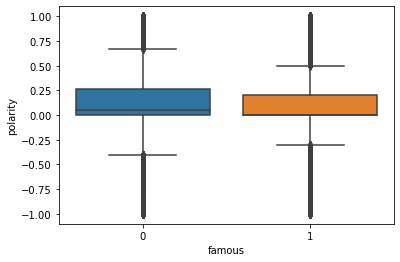

In [49]:
sns.boxplot(y='polarity', x='famous', data=quotes_speaker_merged)

TextBlob allows to determine the sentiment of a sentence, aka if it is positive (1), negative (-1) or neutral (0). From the dataset we have, we can see that there is a majority of positive and neutral quotes compared to negative quote. We are interested by the distribution between famous and not famous quotes to see if there is a difference in polarity between the 2 sets. TextBlob is rather simple and doesn't take into account the word context compared to other ML methods.

## Subjectivity

In this part the aim is to assess the subjectivity of a given quote in order to determine if it is an expression of opinion or a factual\neutral sentence.

In [50]:
subjectivity=[]

for sentence in sentences:
    quote_sub = TextBlob(sentence).sentiment.subjectivity
    subjectivity.append(quote_sub)


In [51]:
quotes_speaker_merged['subjectivity']=subjectivity

<AxesSubplot:xlabel='famous', ylabel='subjectivity'>

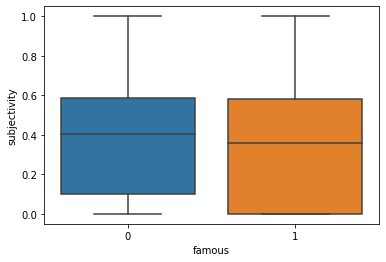

In [52]:
sns.boxplot(y='subjectivity',x='famous', data=quotes_speaker_merged)

TextBlob also allows to determine the subjectivity of a sentence, that is to say if the quote expresses an emotion/opinion/judgment (score close to 1) or if it is from a neutral source (score close to 0). Polarity and subjectivity are good options to enrich the dataset with more features.

# Exploratory data analysis

## Visualize the distribution of the number of occurrences between 'famous' and 'non-famous' quotes

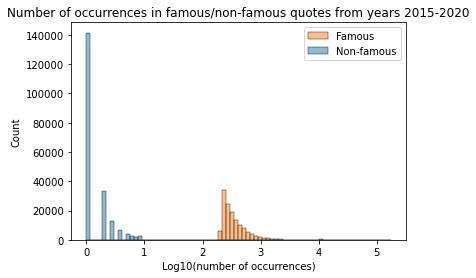

In [59]:
# Plot the distribution of the number of occurrences
pd.options.mode.chained_assignment = None  # default='warn'

quotes_speaker_merged['log10numOccurrences'] = np.log10(quotes_speaker_merged['numOccurrences'])

sns.histplot(data = quotes_speaker_merged, x = quotes_speaker_merged['log10numOccurrences'], hue = 'famous')
plt.title('Number of occurrences in famous/non-famous quotes from years 2015-2020')
plt.legend(loc='upper right', labels=['Famous', 'Non-famous'])
plt.xlabel('Log10(number of occurrences)');

As we defined the threshold for the samples of "famous" and "non-famous" quotes we expect this clear distinction of several order of magnitudes (as shown by the log10 of the number of occurrences).

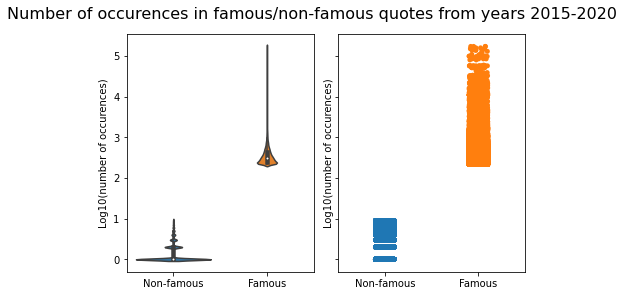

In [60]:
fig, (ax1,ax2) = plt.subplots(1,2, constrained_layout = True, sharey = True)
sns.violinplot(y = np.log10(quotes_speaker_merged['numOccurrences']), ax = ax1, x = quotes_speaker_merged['famous'])
ax1.set_xticklabels(["Non-famous", "Famous"])
ax1.set_xlabel("")
ax1.set_ylabel("Log10(number of occurences)")

sns.stripplot(y= np.log10(quotes_speaker_merged['numOccurrences']), ax = ax2, x = quotes_speaker_merged['famous'])
ax2.set_xlabel("")
ax2.set_xticklabels(["Non-famous", "Famous"])
ax2.set_ylabel("Log10(number of occurences)")

fig.suptitle("Number of occurences in famous/non-famous quotes from years 2015-2020", fontsize = 16);

### Length of a quote
##### We hypothesize that a shorter quote is more likely to be impactful, and thus famous. 

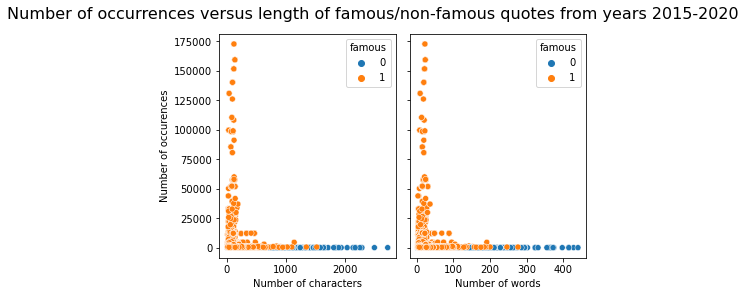

In [61]:
fig2, (ax1,ax2) = plt.subplots(1,2, constrained_layout = True, sharey = True)
sns.scatterplot(x = 'nb_characters', y = 'numOccurrences', hue = 'famous', data = quotes_speaker_merged, ax = ax1)
ax1.set_xlabel("Number of characters")
ax1.set_ylabel("Number of occurences")

sns.scatterplot(x = 'nb_words', y = 'numOccurrences', hue = 'famous', data = quotes_speaker_merged, ax = ax2)
ax2.set_xlabel("Number of words")
ax2.set_ylabel("Number of occurences")

fig2.suptitle("Number of occurrences versus length of famous/non-famous quotes from years 2015-2020", fontsize = 16);

From this plot we see that the most famous quotes are shorter (few words and few characters), whereas the longest quotes are "non-famous", which could be an interesting feature for a future classifier implementation.
However the figures below show that this distinction is not obvious. Longer quotes are more likely to be non-famous but shorter quotes don't mean they will be famous.

In [62]:
(quotes_speaker_merged.groupby("famous"))["nb_characters"].describe()

,count,mean,std,min,25%,50%,75%,max
famous,,,,,,,,
0,206207.0,133.788800,103.617605,10.0,64.0,109.0,173.0,2712.0
1,132226.0,93.107846,65.498333,10.0,46.0,76.0,123.0,1516.0


In [63]:
(quotes_speaker_merged.groupby("famous"))["nb_words"].describe()

,count,mean,std,min,25%,50%,75%,max
famous,,,,,,,,
0,206207.0,24.255437,18.542433,2.0,12.0,20.0,31.0,440.0
1,132226.0,16.734008,11.759790,2.0,8.0,14.0,22.0,276.0


We can see that a famous quotes has fewer characters and words wich provides evidence for our hypothesis

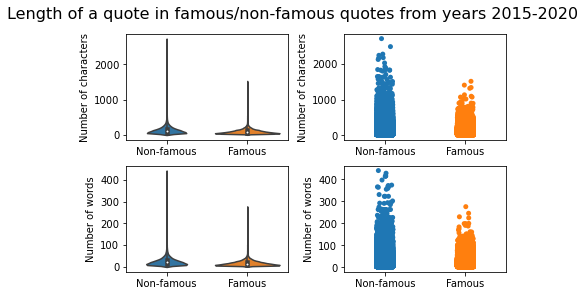

In [64]:
fig3, axs = plt.subplots(2,2, constrained_layout = True, sharey = False)
sns.violinplot(y = quotes_speaker_merged['nb_characters'], ax = axs[0, 0], x = quotes_speaker_merged['famous'])
axs[0, 0].set_xticklabels(["Non-famous", "Famous"])
axs[0, 0].set_xlabel("")
axs[0, 0].set_ylabel("Number of characters")

sns.stripplot(y= quotes_speaker_merged['nb_characters'], ax = axs[0, 1], x = quotes_speaker_merged['famous'])
axs[0, 1].set_xlabel("")
axs[0, 1].set_xticklabels(["Non-famous", "Famous"])
axs[0, 1].set_ylabel("Number of characters")

sns.violinplot(y= quotes_speaker_merged['nb_words'], ax = axs[1, 0], x = quotes_speaker_merged['famous'])
axs[1, 0].set_xlabel("")
axs[1, 0].set_xticklabels(["Non-famous", "Famous"])
axs[1, 0].set_ylabel("Number of words")

sns.stripplot(y= quotes_speaker_merged['nb_words'], ax = axs[1, 1], x = quotes_speaker_merged['famous'])
axs[1, 1].set_xlabel("")
axs[1, 1].set_xticklabels(["Non-famous", "Famous"])
axs[1, 1].set_ylabel("Number of words")

fig3.suptitle("Length of a quote in famous/non-famous quotes from years 2015-2020", fontsize = 16);

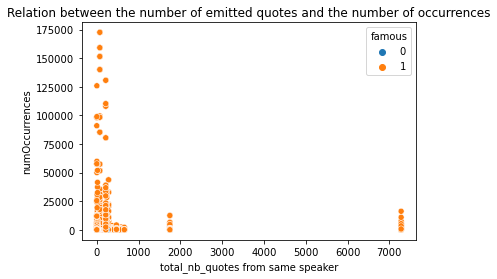

In [65]:
#Scatter plot 
sns.scatterplot(x = 'total_nb_quotes', y= 'numOccurrences', hue = 'famous', data = quotes_speaker_merged)
plt.xlabel('total_nb_quotes from same speaker')
plt.title("Relation between the number of emitted quotes and the number of occurrences");

There doesn't seem to be a clear relationship between the number of occurrences a quote will get compared to the total number of quotes emitted by a person. This means that a person emitting a lot of quotes (on the order of 10^8) will not obtain more occurences per quote than somebody with less than 10 emitted quotes.
Indeed, it is quite suprising that speakers that emitted the most quotes actually have a low number of occurrences.

## Scatterplots

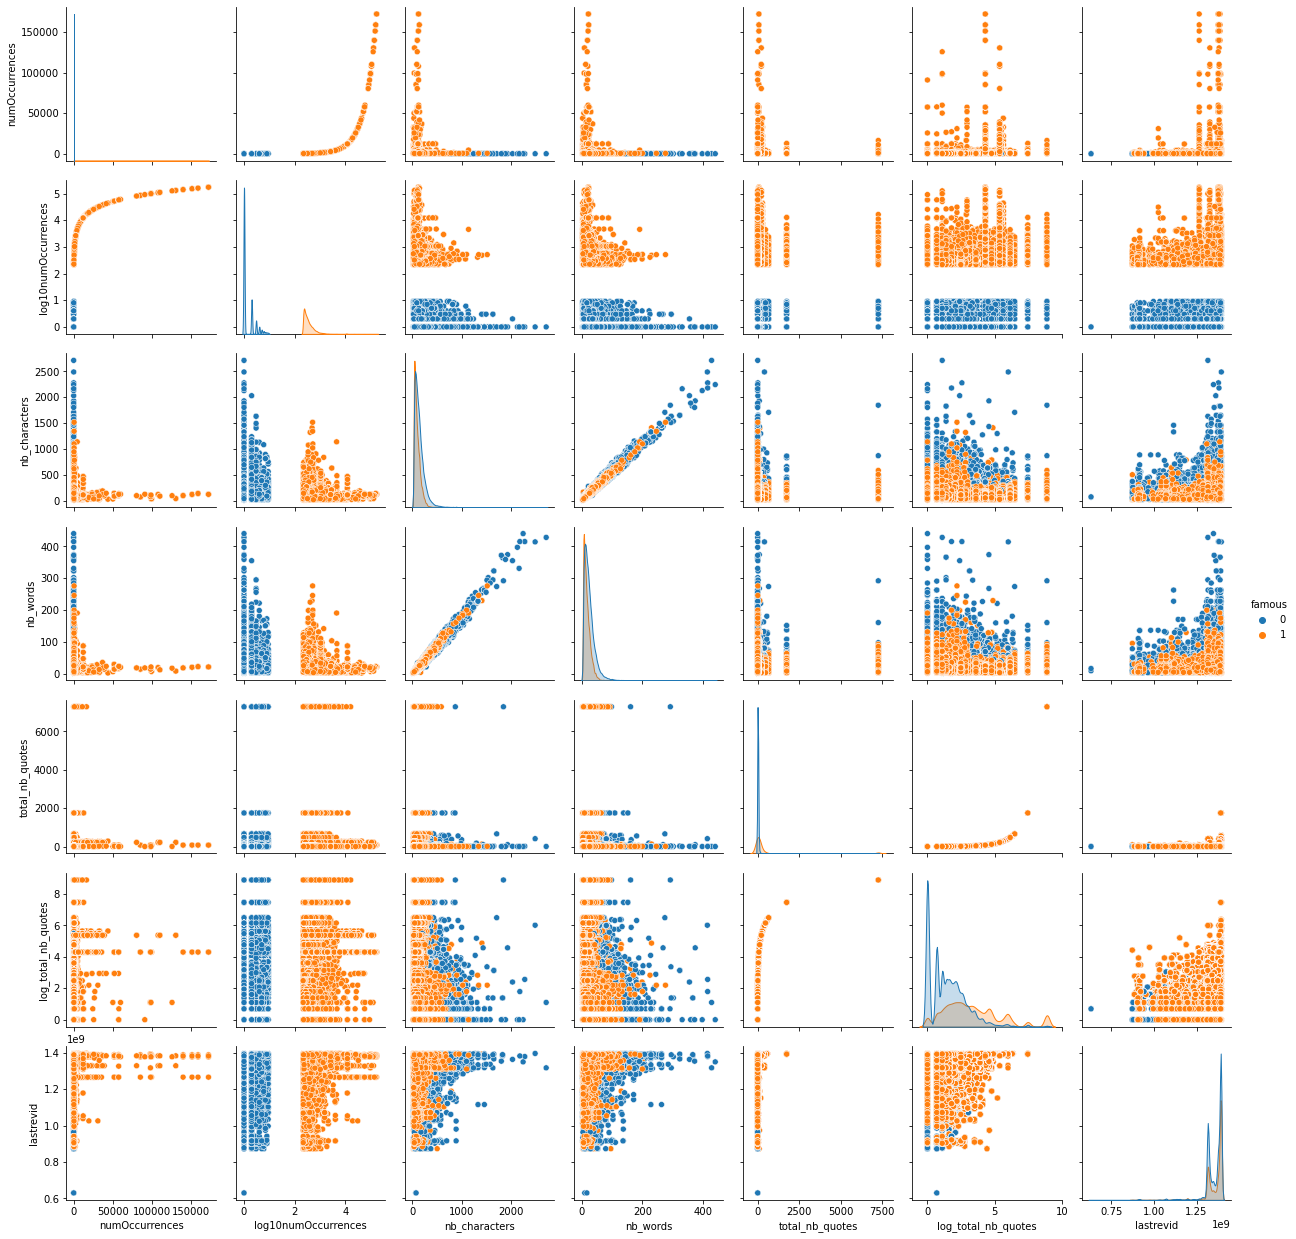

In [66]:
sns.pairplot(quotes_speaker_merged, hue = 'famous')

# Regression analysis

In [ ]:
# Declares the model
mod = smf.ols(formula='numOccurrences ~ nb_words * nb_characters * total_nb_quotes * C(gender) * C(occupation) * C(nationality)* subjectivity * polarity ', data=quotes_speaker_merged)

# Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
res = mod.fit()

# Print thes summary output provided by the library.
print(res.summary())

## Embeddings and PCA

The aim is to embed the quotes using a BERT pre-trained model in order to obtain a vectorized representation of quotes. Once in the embedding space, we can perform a PCA to retrieve the 2 principal components of the embedded dataset. We can then visualize them on a scatterplot to see if we observe a clustering of famous and non-famous quotes.

## Generation of embeddings

In [ ]:
#from sentence_transformers import SentenceTransformer

#sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [ ]:
#sentence_embeddings = sbert_model.encode(sentences)

In [ ]:
#embeddings = pd.DataFrame (sentence_embeddings)

In [ ]:
#embeddings.to_csv('embeddings.csv')

In [ ]:
#Loading the embeddings
sentence_embeddings=pd.read_csv('embeddings.csv')

### PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(sentence_embeddings)

In [ ]:
PCA=pd.DataFrame(principalComponents, columns=['PC1', 'PC2'])

In [ ]:
PCA['famous']=merged['famous'].to_list()

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(PCA['PC1'],PCA['PC2'],c=PCA['famous'], cmap='prism')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualization of 2D PCA')

From the visualization we have for now, there doesn't seem to be a clustering between 'famous' and 'non-famous quote in the embeddings space.